In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

import pandas as pd
import numpy as np
import seaborn as sns
sns.set(context="talk", style="whitegrid", palette="muted", font="serif")
plt.rcParams.update({
    "text.usetex": False,  # 如果安装了 LaTeX 可设为 True
    "font.size": 20,
    "axes.labelsize": 16,
    "axes.titlesize": 18,
    "legend.fontsize": 20,
    "xtick.labelsize": 18,
    "ytick.labelsize": 12,
    "figure.figsize": (14, 6)
})

# Color list

In [2]:
color_list1 = ['#FFE4E1','#E9967A', '#FA8072','#CD5C5C','#C8331F','#C70000']
color_list2 = ['#CD5C5C', '#CD853F', '#F4A460','#FFDAB9', '#B0C4DE','#ADD8E6']

color_list_darker = ['#8A2F2F', '#823622', '#8B592A', '#A6825E', '#6C85A1', '#6C9AB8']

# UTS

In [139]:
data_path = "../dataset/NASDAQ_NYSE/stock_sup/google_finance/NASDAQ_AAPL_30Y.csv"
data = pd.read_csv(data_path)
data.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
data.date = data['date'].str[:10]
data.date = pd.to_datetime(data.date).dt.date
data.set_index('date', drop=True, inplace=True)

start_date = '2015-03-01'
end_date = '2015-04-05'
mask = (data.index >= pd.to_datetime(start_date)) & (data.index <= pd.to_datetime(end_date))
df_interval = data.loc[mask]
df_interval = df_interval[(df_interval >= 0).all(axis=1)]

In [25]:
df_interval

,Open,High,Low,Close,Volume
date,,,,,
2015-03-02,129.25,130.28,128.30,129.09,48096663
2015-03-03,128.96,129.52,128.09,129.36,37816283
2015-03-04,129.10,129.56,128.32,128.54,31666340
2015-03-05,128.58,128.75,125.76,126.41,56517146
2015-03-06,128.40,129.37,126.26,126.60,72842060
...,...,...,...,...,...
2015-06-04,129.58,130.58,128.91,129.36,38450118
2015-06-05,129.50,129.69,128.36,128.65,35626800
2015-06-08,128.90,129.21,126.83,127.80,52674786


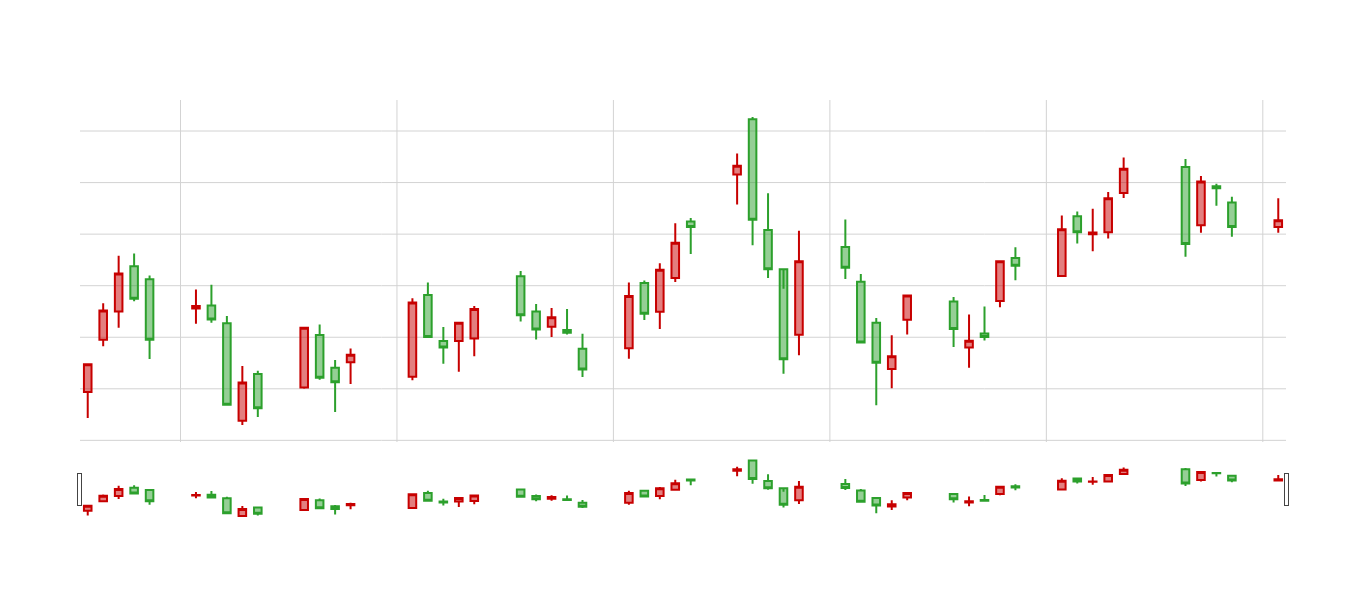

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df_interval.index,
                open=df_interval['Open'],
                high=df_interval['High'],
                low=df_interval['Low'],
                close=df_interval['Close'],
                increasing_line_color='#C70000',  # 加深上涨颜色
                decreasing_line_color='#2CA02C'    # 加深下跌颜色
                )])

fig.update_layout(
    width=1000,
    height=600,
    xaxis=dict(
        showticklabels=False,
        showgrid=True,
        gridcolor='lightgray',  # 设置网格线颜色为浅灰色
        zeroline=False
    ),
    yaxis=dict(
        showticklabels=False,
        showgrid=True,
        gridcolor='lightgray',  # 设置网格线颜色为浅灰色
        zeroline=False
    ),
    plot_bgcolor='white',      # 设置绘图区域背景颜色为白色
)

fig.show()
fig.write_image("test.png")

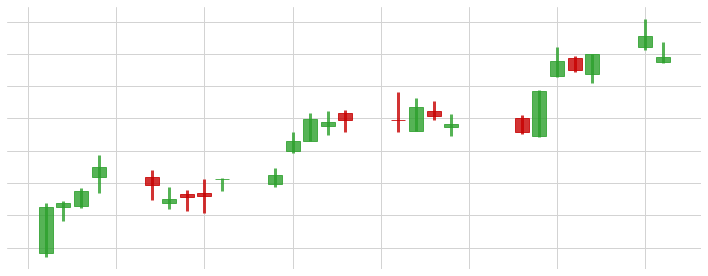

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from matplotlib.collections import LineCollection

def candlestick_plot(ax, df, width=2, colorup='green', colordown='red', alpha=0.8):
    ohlc = df[['Open', 'High', 'Low', 'Close']].copy()
    ohlc['date'] = df.index.map(mpl_dates.date2num)
    ohlc_values = ohlc[['date', 'Open', 'High', 'Low', 'Close']].values

    segments = []
    colors = []
    for date, open_, high, low, close in ohlc_values:
        x = date
        if close >= open_:
            color = colorup
        else:
            color = colordown
        colors.append(color)

        # 垂直线段
        segments.append(((x, low), (x, high)))

        # K 线实体
        if close != open_:
            rect = plt.Rectangle((x - width / 2, min(open_, close)),
                                 width, abs(close - open_),
                                 facecolor=color, edgecolor=color, alpha=alpha)
            ax.add_patch(rect)
        else:  # 十字星
            ax.plot([x - width / 2, x + width / 2], [open_, close], color=color, linewidth=1)
    # 绘制垂直线段
    line_segments = LineCollection(segments, linewidths=3, colors=colors, alpha=alpha)
    ax.add_collection(line_segments)

    ax.xaxis.set_major_formatter(mpl_dates.DateFormatter('%Y-%m-%d'))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # 去除坐标轴边框
    for spine in ax.spines.values():
        spine.set_visible(False)
        ax.autoscale_view()
        
    return ax
# 假设你的 DataFrame 叫做 df_interval，并且包含 'Open', 'Close', 'High', 'Low' 列，索引为日期时间
# 例如：
# import numpy as np
# dates = pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'])
# data = {'Open': [10, 12, 11, 13, 12],
#         'Close': [12, 11, 13, 12, 14],
#         'High': [13, 14, 13.5, 14.5, 15],
#         'Low': [9, 10, 10.5, 11.5, 11]}
# df_interval = pd.DataFrame(data, index=dates)
data_path = "../dataset/NASDAQ_NYSE/stock_sup/google_finance/NASDAQ_AAPL_30Y.csv"
data = pd.read_csv(data_path)
data.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
data.date = data['date'].str[:10]
data.date = pd.to_datetime(data.date).dt.date
data.set_index('date', drop=True, inplace=True)

start_date = '2016-03-01'
end_date = '2016-04-05'
mask = (data.index >= pd.to_datetime(start_date)) & (data.index <= pd.to_datetime(end_date))
df_interval = data.loc[mask]
df_interval = df_interval[(df_interval >= 0).all(axis=1)]

fig, ax = plt.subplots(figsize=(10, 4))
candlestick_plot(ax, df_interval, width=0.8, colorup='#2CA02C', colordown='#C70000') # 颜色与 plotly 的加深色调对应

# 去除横纵坐标刻度标签
ax.set_xticklabels([])
ax.set_yticklabels([])

# 保留网格线，设置颜色为灰色
ax.grid(True, color='lightgray')

# 设置背景颜色为白色
ax.set_facecolor('white')

# 添加边框，颜色为黑色
for spine in ax.spines.values():
    spine.set_edgecolor('black')

plt.xlabel('') # 虽然刻度标签去掉了，但可以保留轴标签
plt.ylabel('') # 同样可以保留轴标签
plt.tight_layout()
plt.savefig("test4.png", dpi=900)
plt.show()


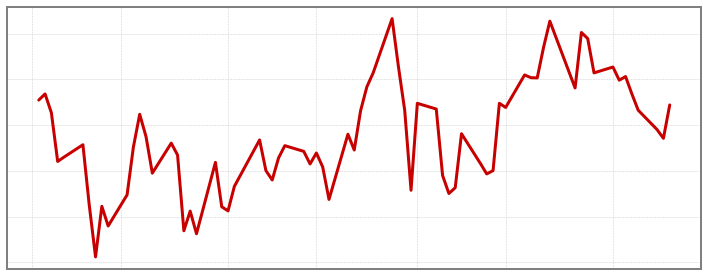

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

data = df_interval['Close']
# 使用适合学术论文的Seaborn风格
sns.set_theme(style="whitegrid")

# 假设你的 pd.Series 是 series
plt.figure(figsize=(10, 4))

# 绘图，线条加粗
sns.lineplot(x=data.index, label='Close', y=data.values, linewidth=3, color='#C70000')

# 获取当前坐标轴
ax = plt.gca()

# 设置轴标签
ax.set_xlabel("")
ax.set_ylabel("")  # 不显示纵坐标名

# 去除坐标刻度数值
ax.set_xticklabels([])
ax.set_yticklabels([])

# 添加 legend 在图上方
if ax.get_legend():
    ax.get_legend().remove()

# 加深边框颜色（只保留左下边框）
for spine in ['left', 'bottom','top','right']:
    ax.spines[spine].set_color('grey')
    ax.spines[spine].set_linewidth(2)

# 保留网格线
ax.grid(True, linestyle='--', linewidth=0.5)

# 紧凑布局并展示
plt.tight_layout()
plt.savefig('UTS.png')
plt.show()

D:\Anaconda\envs\torch\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


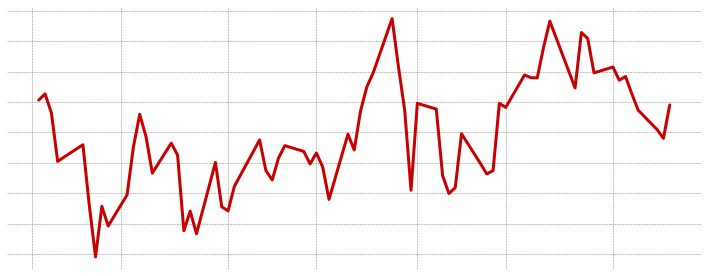

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt
data_path = "../dataset/NASDAQ_NYSE/stock_sup/2013-01-01/NASDAQ_AAPL_1.csv"
data = pd.read_csv(data_path)
data.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
data.date = data['date'].str[:10]
data.date = pd.to_datetime(data.date).dt.date
data.set_index('date', drop=True, inplace=True)

start_date = '2015-03-01'
end_date = '2015-06-10'
mask = (data.index >= pd.to_datetime(start_date)) & (data.index <= pd.to_datetime(end_date))
df_interval = data.loc[mask]
df_interval = df_interval[(df_interval >= 0).all(axis=1)]
data = df_interval['Close']
# 设置风格
sns.set_style("whitegrid")  # whitegrid 是必须的才能自动添加网格

plt.figure(figsize=(10, 4))

# 绘制主线
sns.lineplot(x=data.index, y=data.values, linewidth=3, color='#C70000')

ax = plt.gca()

# 开启网格线
ax.grid(True, linestyle='--', linewidth=0.5, color='grey')

# 隐藏刻度标签（但保留刻度线以显示网格）
ax.set_xticklabels([])
ax.set_yticklabels([])

# 去除坐标轴边框
for spine in ax.spines.values():
    spine.set_visible(False)

# 不显示坐标轴标签与图例
ax.set_xlabel("")
ax.set_ylabel("")
if ax.get_legend():
    ax.get_legend().remove()

plt.tight_layout()
plt.savefig('UTS2.png', dpi=300, bbox_inches='tight',transparent=True)
plt.show()


D:\Anaconda\envs\torch\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


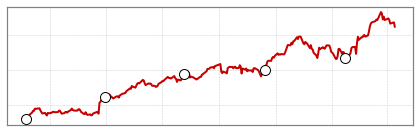

In [139]:
data_path = "../dataset/NASDAQ_NYSE/stock_sup/2013-01-01/NASDAQ_AAPL_1.csv"
data = pd.read_csv(data_path)
data.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
data.date = data['date'].str[:10]
data.date = pd.to_datetime(data.date).dt.date
data.set_index('date', drop=True, inplace=True)

start_date = '2014-02-01'
end_date = '2015-03-10'
mask = (data.index >= pd.to_datetime(start_date)) & (data.index <= pd.to_datetime(end_date))
df_interval = data.loc[mask]
df_interval = df_interval[(df_interval >= 0).all(axis=1)]
series = df_interval['Close']


# Seaborn 白底网格风格
sns.set_theme(style="whitegrid")

plt.figure(figsize=(6, 2))

# 绘制主线条
sns.lineplot(x=series.index, y=series.values, linewidth=2, color='#C70000')

# 添加等间隔的空心黑色小圆点
marker_interval = 60  # 每隔几个点加一个 marker
x_marker = series.index[::marker_interval]
y_marker = series.values[::marker_interval]
plt.plot(x_marker, y_marker, 'o', markerfacecolor='white', markeredgecolor='black', markersize=10, linestyle='None')

# 获取当前坐标轴
ax = plt.gca()

# 坐标轴样式设置
# 设置轴标签
ax.set_xlabel("timestamp", fontsize=24)
ax.set_ylabel("")  # 不显示纵坐标名
ax.set_xticklabels([])
ax.set_yticklabels([])

# 加深边框颜色
for spine in ['left', 'bottom', 'top', 'right']:
    ax.spines[spine].set_color('grey')
    ax.spines[spine].set_linewidth(1.2)

# 保留网格线
ax.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# MTS

## 30Y original data

In [3]:
data_path = "../dataset/NASDAQ_NYSE/stock_sup/google_finance/NASDAQ_AAPL_30Y.csv"
data = pd.read_csv(data_path)
data.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
data.date = data['date'].str[:10]
data.date = pd.to_datetime(data.date).dt.date
data.set_index('date', drop=True, inplace=True)

start_date = '2015-01-02'
end_date = '2015-12-07'
mask = (data.index >= pd.to_datetime(start_date)) & (data.index <= pd.to_datetime(end_date))
df_interval = data.loc[mask]
df_interval = df_interval[(df_interval >= 0).all(axis=1)]

D:\Anaconda\envs\torch\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [4]:
df_interval

,Open,High,Low,Close,Volume
date,,,,,
2014-01-02,79.383,79.5760,78.8600,79.0190,58791957
2014-01-03,78.980,79.1000,77.2000,77.2800,98303870
2014-01-06,76.780,78.1100,76.2300,77.7000,103359151
2014-01-07,77.760,77.9943,76.8464,77.1482,79432766
2014-01-08,76.970,77.9400,76.9600,77.6400,64686685
...,...,...,...,...,...
2016-12-01,110.365,110.9400,109.0300,109.4900,37086862
2016-12-02,109.170,110.0900,108.8500,109.9000,26527997
2016-12-05,110.000,110.0300,108.2500,109.1100,34324540


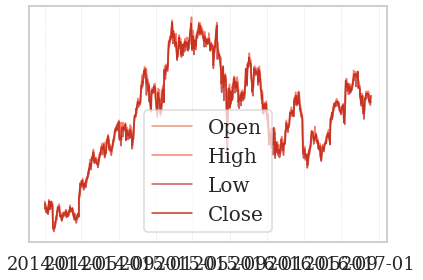

In [5]:
col_list = ['Open', 'High', 'Low', 'Close']

i=1
fig, ax = plt.subplots()
for col in col_list:
    ax.plot(df_interval.index, df_interval[col], label=col, linewidth=1.5, color=color_list1[i])
    i+=1
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.7)
ax.set_yticks([])
ax.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.savefig('Single-Stock Multi-Features.png')
plt.show()

## MTS

In [3]:
data_path = "../dataset/NASDAQ_NYSE/stock_sup/2013-01-01/NASDAQ_AAPL_1.csv"
data = pd.read_csv(data_path)
data.date = data['date'].str[:10]
data.date = pd.to_datetime(data.date).dt.date
data.set_index('date', drop=True, inplace=True)

start_date = '2015-03-02'
end_date = '2015-06-07'
mask = (data.index >= pd.to_datetime(start_date)) & (data.index <= pd.to_datetime(end_date))
df_interval = data.loc[mask]
df_interval = df_interval[(df_interval >= 0).all(axis=1)]
df_interval = df_interval[['5-day', '10-day', 'Close']]

D:\Anaconda\envs\torch\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


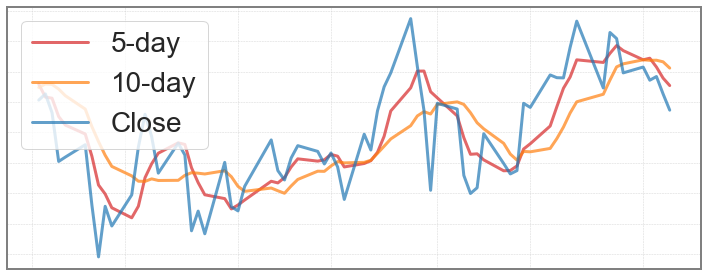

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置风格
sns.set_theme(style="whitegrid")

# 创建图像
fig, ax = plt.subplots(figsize=(10, 4))

# 绘制每条线并保存 line 对象用于 legend
lines = []
labels = df_interval.columns.tolist()
color_list1 = ['#D62728', '#FF7F0E', '#1F77B4', '#2CA02C', '#9467BD']

for i, col in enumerate(df_interval.columns):
    line, = ax.plot(df_interval.index, df_interval[col],
                    linewidth=3,
                    color=color_list1[i],
                    label=col, alpha=0.7)
    lines.append(line)

# 添加 legend 在图上方
ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.8, fontsize=28)

# 去除坐标轴刻度数字与标签
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', which='both', length=0)

# 保留网格线
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.8)

# 加深边框
for spine in ['left', 'bottom', 'top', 'right']:
    ax.spines[spine].set_color('grey')
    ax.spines[spine].set_linewidth(2)

# 紧凑布局
plt.tight_layout()

# 保存或展示图像
plt.savefig("MTS.png", dpi=300)
plt.show()


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
data_path = "../dataset/NASDAQ_NYSE/stock_sup/2013-01-01/NASDAQ_AAPL_1.csv"

# 设置风格
sns.set_theme(style="whitegrid")

# 绘制每条线并保存 line 对象用于 legend
lines = []
labels = df_interval.columns.tolist()
color_list1 = ['#D62728', '#FF7F0E', '#1F77B4', '#2CA02C', '#9467BD']

start_date = '2015-01-02'
end_date = '2015-12-07'


def plot_conv(path, start_date, end_date, title):
    data = pd.read_csv(path)
    data.date = data['date'].str[:10]
    data.date = pd.to_datetime(data.date).dt.date
    data.set_index('date', drop=True, inplace=True)

    mask = (data.index >= pd.to_datetime(start_date)) & (data.index <= pd.to_datetime(end_date))
    df_interval = data.loc[mask]
    df_interval = df_interval[(df_interval >= 0).all(axis=1)]
    df_interval = df_interval[['5-day', '10-day', 'Close']]
    
    fig, ax = plt.subplots(figsize=(10, 4))
    for i, col in enumerate(df_interval.columns):
        line, = ax.plot(df_interval.index, df_interval[col],
                        linewidth=3,
                        color=color_list1[i],
                        label=col, alpha=0.8)
        lines.append(line)

    # 添加 legend 在图上方
    if title == 'conv3big':
        ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.7, fontsize=40)

    # 去除坐标轴刻度数字与标签
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='both', which='both', length=0)

    # 保留网格线
    ax.grid(True, linestyle='--', linewidth=0.8, alpha=0.8)

    # 加深边框
    for spine in ['left', 'bottom', 'top', 'right']:
        ax.spines[spine].set_color('white')
        ax.spines[spine].set_linewidth(2)

    # 紧凑布局
    plt.tight_layout()

    # 保存或展示图像
    plt.savefig(title+".png", dpi=900)
    plt.show()


D:\Anaconda\envs\torch\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


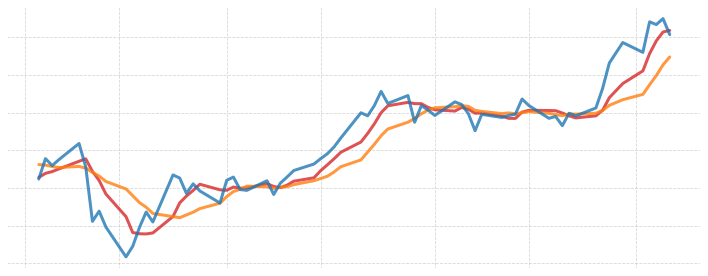

D:\Anaconda\envs\torch\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


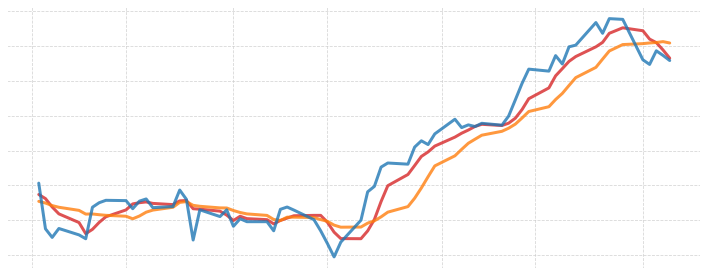

D:\Anaconda\envs\torch\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


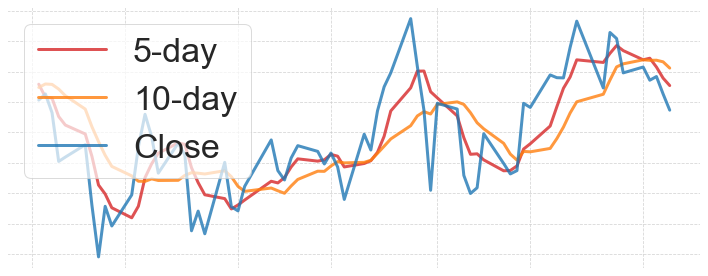

D:\Anaconda\envs\torch\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


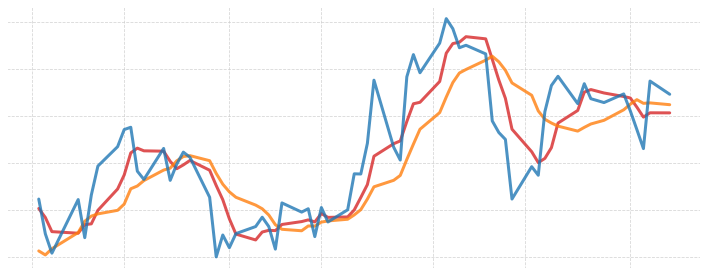

In [10]:
data_path = "../dataset/NASDAQ_NYSE/stock_sup/2013-01-01/NASDAQ_AAPL_1.csv"
start_date = '2013-09-02'
end_date = '2013-12-07'
title = "conv1big"
plot_conv(data_path, start_date, end_date, title)

start_date = '2014-09-02'
end_date = '2014-12-07'
title = "conv2big"
plot_conv(data_path, start_date, end_date, title)

start_date = '2015-03-02'
end_date = '2015-06-07'
title = "conv3big"
plot_conv(data_path, start_date, end_date, title)

start_date = '2015-09-02'
end_date = '2015-12-07'
title = "conv4big"
plot_conv(data_path, start_date, end_date, title)

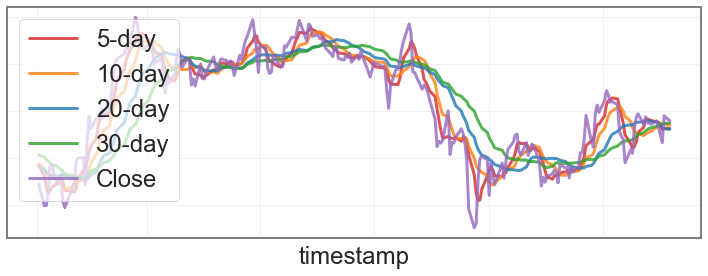

In [416]:
import matplotlib.pyplot as plt
import seaborn as sns
data_path = "../dataset/NASDAQ_NYSE/stock_sup/2013-01-01/NASDAQ_AAPL_1.csv"
data = pd.read_csv(data_path)
data.date = data['date'].str[:10]
data.date = pd.to_datetime(data.date).dt.date
data.set_index('date', drop=True, inplace=True)

start_date = '2015-01-02'
end_date = '2015-12-07'
mask = (data.index >= pd.to_datetime(start_date)) & (data.index <= pd.to_datetime(end_date))
df_interval = data.loc[mask]
df_interval = df_interval[(df_interval >= 0).all(axis=1)]
# 设置风格
sns.set_theme(style="whitegrid")

# 创建图像
fig, ax = plt.subplots(figsize=(10, 4))

# 绘制每条线并保存 line 对象用于 legend
lines = []
labels = df_interval.columns.tolist()
color_list1 = ['#D62728', '#FF7F0E', '#1F77B4', '#2CA02C', '#9467BD']

for i, col in enumerate(df_interval.columns):
    line, = ax.plot(df_interval.index, df_interval[col],
                    linewidth=3,
                    color=color_list1[i],
                    label=col, alpha=0.8)
    lines.append(line)

# 添加 legend 在图上方
ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.7, fontsize=24)

# 去除坐标轴刻度数字与标签
ax.set_xlabel("timestamp", fontsize=24)
ax.set_ylabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', which='both', length=0)

# 保留网格线
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# 加深边框
for spine in ['left', 'bottom', 'top', 'right']:
    ax.spines[spine].set_color('grey')
    ax.spines[spine].set_linewidth(2)

# 紧凑布局
plt.tight_layout()

# 保存或展示图像
plt.savefig("MTS2.png", dpi=300, transparent=True)
plt.show()


D:\Anaconda\envs\torch\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


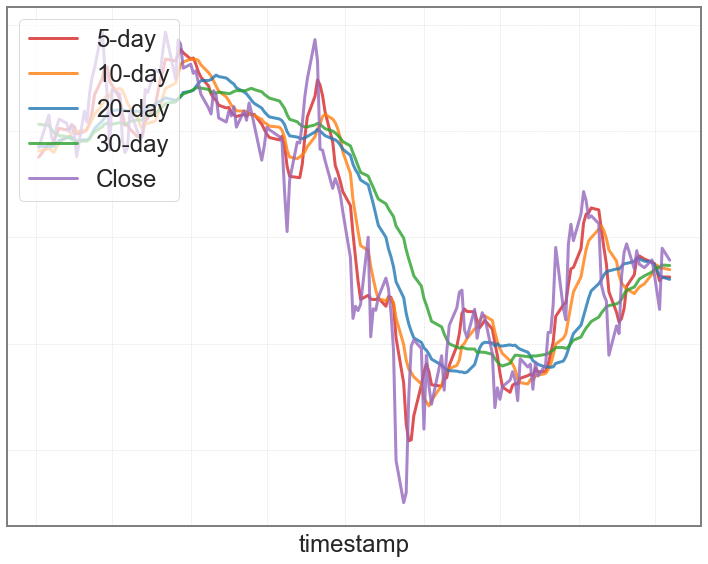

In [428]:
import matplotlib.pyplot as plt
import seaborn as sns
data_path = "../dataset/NASDAQ_NYSE/stock_sup/2013-01-01/NASDAQ_AAPL_1.csv"
data = pd.read_csv(data_path)
data.date = data['date'].str[:10]
data.date = pd.to_datetime(data.date).dt.date
data.set_index('date', drop=True, inplace=True)

start_date = '2015-04-02'
end_date = '2015-12-07'
mask = (data.index >= pd.to_datetime(start_date)) & (data.index <= pd.to_datetime(end_date))
df_interval = data.loc[mask]
df_interval = df_interval[(df_interval >= 0).all(axis=1)]
# 设置风格
sns.set_theme(style="whitegrid")

# 创建图像
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制每条线并保存 line 对象用于 legend
lines = []
labels = df_interval.columns.tolist()
color_list1 = ['#D62728', '#FF7F0E', '#1F77B4', '#2CA02C', '#9467BD']

for i, col in enumerate(df_interval.columns):
    line, = ax.plot(df_interval.index, df_interval[col],
                    linewidth=3,
                    color=color_list1[i],
                    label=col, alpha=0.8)
    lines.append(line)

# 添加 legend 在图上方
ax.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.7, fontsize=24)

# 去除坐标轴刻度数字与标签
ax.set_xlabel("timestamp", fontsize=24)
ax.set_ylabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', which='both', length=0)

# 保留网格线
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# 加深边框
for spine in ['left', 'bottom', 'top', 'right']:
    ax.spines[spine].set_color('grey')
    ax.spines[spine].set_linewidth(2)

# 紧凑布局
plt.tight_layout()

# 保存或展示图像
plt.savefig("input.png", dpi=300)
plt.show()


# Multi-Stock Single-Feature

In [205]:
stock_list = ['AAPL', 'ADBE', 'PRAA']

In [210]:
data_path = "../dataset/NASDAQ_NYSE/stock_sup/2013-01-01/NASDAQ_AAPL_1.csv"
data = pd.read_csv(data_path)
data.date = data['date'].str[:10]
data.date = pd.to_datetime(data.date).dt.date
data.set_index('date', drop=True, inplace=True)

start_date = '2014-02-02'
end_date = '2014-07-07'
mask = (data.index >= pd.to_datetime(start_date)) & (data.index <= pd.to_datetime(end_date))
df_interval = data.loc[mask]
df_interval = df_interval[(df_interval >= 0).all(axis=1)]

data2 = pd.DataFrame(index=df_interval.index)
for stock in stock_list:
    df = pd.read_csv("../dataset/NASDAQ_NYSE/stock_sup/google_finance/NASDAQ_"+stock+"_30Y.csv")
    df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
    df.date = df['date'].str[:10]
    df.date = pd.to_datetime(df.date).dt.date
    df.set_index('date', drop=True, inplace=True)
    df = df[(df >= 0).all(axis=1)]
    data2[stock] = df['Close']

D:\Anaconda\envs\torch\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



In [211]:
data2

,AAPL,ADBE,PRAA
date,,,
2014-02-03,71.6500,58.09,48.12
2014-02-04,72.6800,59.72,48.75
2014-02-05,73.2271,61.00,48.01
2014-02-06,73.2200,61.34,50.45
2014-02-07,74.2400,62.88,51.16
...,...,...,...
2014-06-30,92.9300,72.36,59.53
2014-07-01,93.5200,73.01,60.31
2014-07-02,93.4800,72.76,60.04


In [212]:
data2 = data2.dropna()

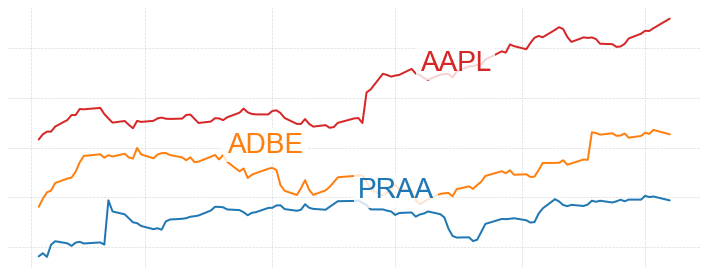

In [218]:
i=0
num_points = len(data2)
label_positions = [int(num_points * x) for x in [0.6, 0.3, 0.5, 0.1, 0.7, 0.4]]
fig, ax = plt.subplots(figsize=(10,4))
for col in data2.columns:
    ax.plot(data2[col], label=col, linewidth=2, color=color_list1[i])
    # 设置文字
    pos = label_positions[i]
    ax.annotate(col, xy=(data2.index[pos], data2[col].iloc[pos]),
                xytext=(4, 10), textcoords='offset points', fontsize=28, color=color_list1[i],
                ha='left', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
    i+=1
# ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.7)
    # 去除坐标轴刻度数字与标签
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', which='both', length=0)

# 保留网格线
ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
# 加深边框
for spine in ['left', 'bottom', 'top', 'right']:
    ax.spines[spine].set_color('white')
    ax.spines[spine].set_linewidth(2)

plt.tight_layout()
plt.savefig("Multi-Stock Single-Features.png", dpi = 300)
plt.show()

# Multi-Stock Multi-Feature

In [102]:
color_list_red = ['#FFE4E1','#E9967A', '#FA8072','#CD5C5C','#C8331F']
color_list_blue = ['#D8E2F8', '#A2BFE8', '#6FA6E3', '#6495ED', '#447FD4']

color_list_green = ['#D1E7D1', '#8FBC8F', '#8CCB8C', '#4DB74D', '#389F38']

color_list_orange = ['#FFE0B2', '#FFCC80', '#FFB74D', '#FF9800', '#D58109']
color_list_yellow = ['#FDDC9E', '#FBD279', '#FBC764', '#FBC02D', '#E29F0E']

color_list_purple = ['#E2D6F4', '#C1A6DD', '#AC7FD6', '#9470C6', '#7B43C7']

color_list = [color_list_red, color_list_blue, color_list_green, color_list_orange, color_list_yellow, color_list_purple]

D:\Anaconda\envs\torch\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



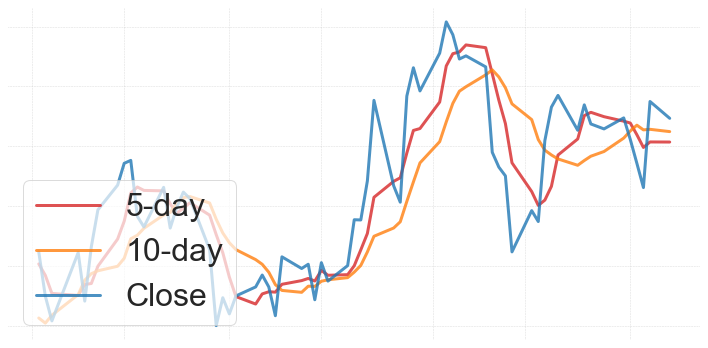

D:\Anaconda\envs\torch\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



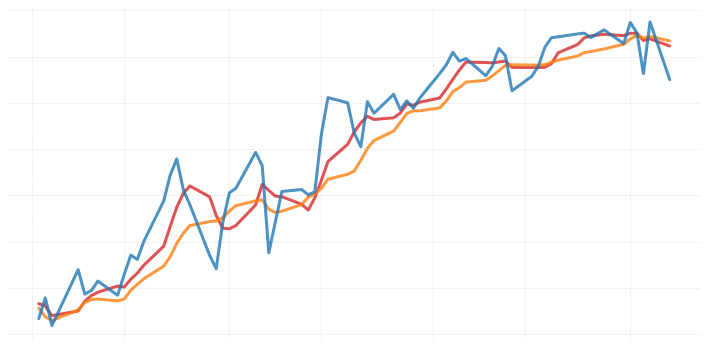

D:\Anaconda\envs\torch\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



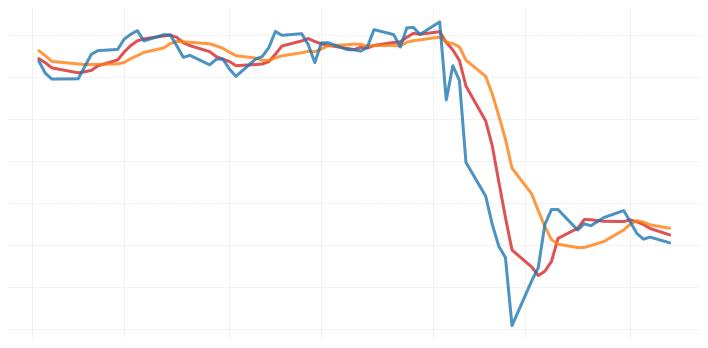

D:\Anaconda\envs\torch\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



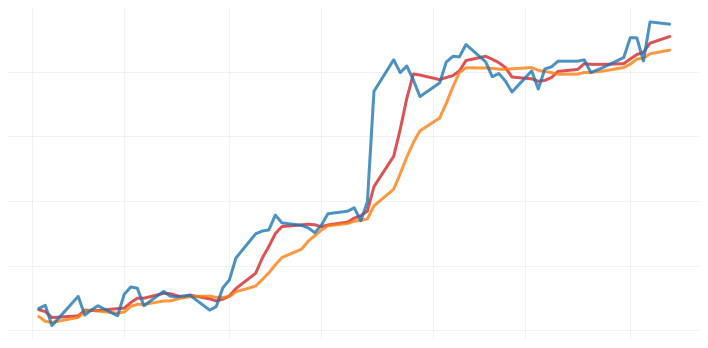

D:\Anaconda\envs\torch\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



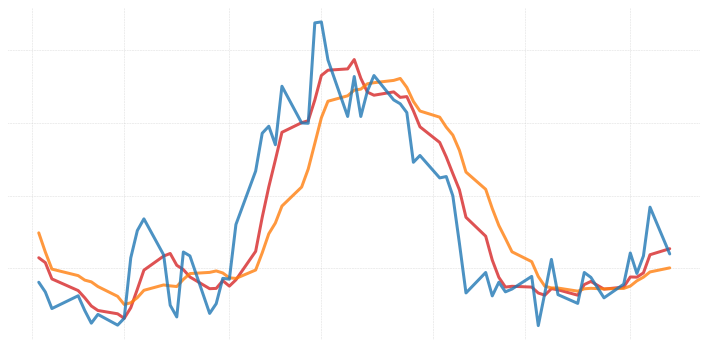

D:\Anaconda\envs\torch\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



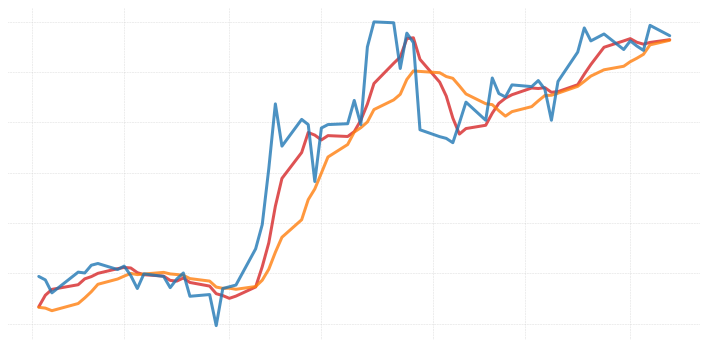

In [106]:
stock_list = ['AAPL', 'ADBE', 'PRAA', 'MSFT', 'PSAU', 'TBNK']
loc_list = ['lower left','upper left', 'lower left', 'upper left', 'lower left', 'upper left']
for stock, col_list, loc in zip(stock_list, color_list, loc_list):
    data_path = "../dataset/NASDAQ_NYSE/stock_sup/2013-01-01/NASDAQ_"+stock+"_1.csv"
    data = pd.read_csv(data_path)
    data.date = data['date'].str[:10]
    data.date = pd.to_datetime(data.date).dt.date
    data.set_index('date', drop=True, inplace=True)

    start_date = '2015-09-02'
    end_date = '2015-12-07'
    mask = (data.index >= pd.to_datetime(start_date)) & (data.index <= pd.to_datetime(end_date))
    df_interval = data.loc[mask]
    df_interval = df_interval[(df_interval >= 0).all(axis=1)]
    df_interval = df_interval[['5-day', '10-day', 'Close']]
    # 设置风格
    sns.set_theme(style="whitegrid")

    # 创建图像
    fig, ax = plt.subplots(figsize=(10, 5))

    # 绘制每条线并保存 line 对象用于 legend
    lines = []
    labels = df_interval.columns.tolist()
    color_list1 = ['#D62728', '#FF7F0E', '#1F77B4', '#2CA02C', '#9467BD']

    for i, col in enumerate(df_interval.columns):
        line, = ax.plot(df_interval.index, df_interval[col],
                        linewidth=3,
                        color=color_list1[i],
                        label=col, alpha=0.8)
        lines.append(line)

    # 添加 legend 在图上方
    if stock == "AAPL":
        ax.legend(loc=loc, frameon=True, fancybox=True, framealpha=0.7, fontsize=32)

    # 去除坐标轴刻度数字与标签
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='both', which='both', length=0)

    # 保留网格线
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    # 加深边框
    for spine in ['left', 'bottom', 'top', 'right']:
        ax.spines[spine].set_color('white')
        ax.spines[spine].set_linewidth(2)

    # 紧凑布局
    plt.tight_layout()

    # 保存或展示图像
    plt.savefig("intro_"+stock+".png", dpi=300)
    plt.show()